# Random Variables and Distributions: Geometric
Name: Arthur Pontes Nader

##### The smartest player at the table is the one who observes the most.

## Libraries

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

## Geometric distibution

When you see an event that seems similar to: number of failures in a sequence of independent Bernoulli trials until the first success is observed, remember to use the geometric distibution.

$$ P(X = k) = (1 - \theta)^{k-1} \theta $$

In [40]:
def geometric(k, p):
    
    return stats.geom.pmf(k, p)

In [41]:
k = np.arange(1,20)
p = 0.4
probs = geometric(k, p)

In [42]:
probs

array([4.00000000e-01, 2.40000000e-01, 1.44000000e-01, 8.64000000e-02,
       5.18400000e-02, 3.11040000e-02, 1.86624000e-02, 1.11974400e-02,
       6.71846400e-03, 4.03107840e-03, 2.41864704e-03, 1.45118822e-03,
       8.70712934e-04, 5.22427761e-04, 3.13456656e-04, 1.88073994e-04,
       1.12844396e-04, 6.77066378e-05, 4.06239827e-05])

If we need 10 trials until the first succes, the associated probability is:

In [53]:
probs[9]

0.004031078399999999

In [54]:
(0.6**9)*(0.4)

0.004031078399999999

The expected value is just 1/p:

In [55]:
1/p

2.5

An approximation:

In [58]:
np.dot(k,probs)

2.4986898765589767

In [59]:
def geometric_cdf(k, p):
    
    return stats.geom.cdf(k, p)

In [60]:
probs_cum = geometric_cdf(k, p)

In [61]:
probs_cum

array([0.4       , 0.64      , 0.784     , 0.8704    , 0.92224   ,
       0.953344  , 0.9720064 , 0.98320384, 0.9899223 , 0.99395338,
       0.99637203, 0.99782322, 0.99869393, 0.99921636, 0.99952982,
       0.99971789, 0.99983073, 0.99989844, 0.99993906])

Let's see the graphs:

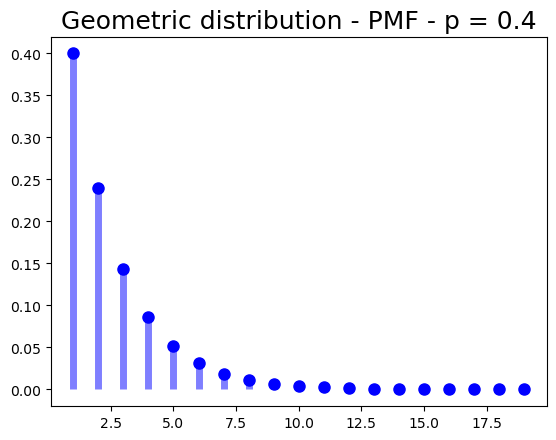

In [90]:
fig, ax = plt.subplots(1, 1)
ax.plot(k, probs, 'bo', ms=8, label='geom pmf')
ax.vlines(k, 0, probs, colors='b', lw=5, alpha=0.5)
ax.set_title('Geometric distribution - PMF - p = 0.4', fontsize = 18)
plt.show()

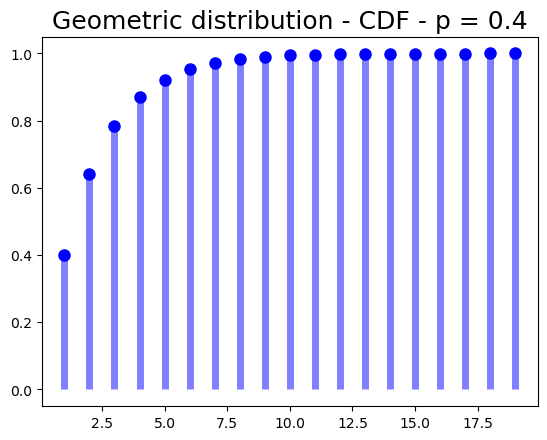

In [91]:
fig, ax = plt.subplots(1, 1)
ax.plot(k, probs_cum, 'bo', ms=8, label='geom cdf')
ax.vlines(k, 0, probs_cum, colors='b', lw=5, alpha=0.5)
ax.set_title('Geometric distribution - CDF - p = 0.4', fontsize = 18)
plt.show()

Observe how p has a significant relation with the n trials needed to get the first succes:

In [257]:
p = 0.001
r = stats.geom.rvs(p, size=10)

In [258]:
r

array([ 128, 1741,  781, 2228, 1944, 3452,  570,  519, 1848,  321])

In [259]:
p = 0.4
r = stats.geom.rvs(p, size=10)

In [260]:
r

array([6, 1, 2, 2, 2, 1, 3, 1, 3, 6])

## Casino machine

You are in a casino, and first of all and the more important: you know that the geometric distibution is memoryless. So, if you lose 9 times in a game that has 1/10 probability of success, this has nothing to do with your 10th attempt. You still have 90% of chance to lose.

But you enter in a room of the casino that is written on the door: "Everyday, we chose 1 among the 10 machines of this room to be a 25/100 succes probability machine". Everytime you won, the machine is reseted and the game started again.

In [237]:
def generate_machines():
    
    machines = [0.1]*9 + [0.25]
    return machines

In [238]:
machines = generate_machines()
machines

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.25]

In [239]:
np.random.shuffle(machines)

All the machines are occupied and you are observing the players. By coincidence, each of the players played 3 full games, and now the room is empty! It's a lucky day because you observed the results and know you can choose the machine with the highest probability of winning, which is the 25/100 machine!

In [240]:
def generate_data_observed(machines):

    data_machines = []
    for p in machines:
        data = stats.geom.rvs(p, size=3)
        data_machines.append(data)
        
    return data_machines

In [241]:
data_machines = generate_data_observed(machines)
data_machines

[array([1, 4, 2]),
 array([4, 8, 5]),
 array([ 2, 48,  2]),
 array([ 9,  7, 25]),
 array([ 3,  3, 12]),
 array([ 4,  3, 12]),
 array([10,  1,  4]),
 array([3, 6, 7]),
 array([38,  8,  6]),
 array([8, 2, 4])]

But the task is still hard, so you decided to put the data in the model of a geometric with p = 0.20, to help to decide:

In [242]:
probs_model = geometric(np.arange(1,50), 0.20)
probs_model

array([2.00000000e-01, 1.60000000e-01, 1.28000000e-01, 1.02400000e-01,
       8.19200000e-02, 6.55360000e-02, 5.24288000e-02, 4.19430400e-02,
       3.35544320e-02, 2.68435456e-02, 2.14748365e-02, 1.71798692e-02,
       1.37438953e-02, 1.09951163e-02, 8.79609302e-03, 7.03687442e-03,
       5.62949953e-03, 4.50359963e-03, 3.60287970e-03, 2.88230376e-03,
       2.30584301e-03, 1.84467441e-03, 1.47573953e-03, 1.18059162e-03,
       9.44473297e-04, 7.55578637e-04, 6.04462910e-04, 4.83570328e-04,
       3.86856262e-04, 3.09485010e-04, 2.47588008e-04, 1.98070406e-04,
       1.58456325e-04, 1.26765060e-04, 1.01412048e-04, 8.11296384e-05,
       6.49037107e-05, 5.19229686e-05, 4.15383749e-05, 3.32306999e-05,
       2.65845599e-05, 2.12676479e-05, 1.70141183e-05, 1.36112947e-05,
       1.08890357e-05, 8.71122859e-06, 6.96898287e-06, 5.57518630e-06,
       4.46014904e-06])

In [243]:
def calculate_probabilities(data_machines, probs_model, print_=False):

    machines_prob = []
    for i in range(len(data_machines)):
        
        if print_:
            print("Machine: " + str(i+1))

        result = 1
        for j in range(3):
            result *= probs_model[data_machines[i][j]]
            
        if print_:
            print("Result: " + str(result))
        
        machines_prob.append(result)
        
    return machines_prob

In [244]:
machines_probs = calculate_probabilities(data_machines, probs_model, True)

Machine: 1
Result: 0.0016777216000000011
Machine: 2
Result: 0.00018014398509482005
Machine: 3
Result: 7.307508186654538e-08
Machine: 4
Result: 8.507059173023481e-07
Machine: 5
Result: 0.00014411518807585608
Machine: 6
Result: 0.00011529215046068483
Machine: 7
Result: 0.0002814749767106563
Machine: 8
Result: 0.00022517998136852504
Machine: 9
Result: 7.307508186654537e-08
Machine: 10
Result: 0.00035184372088832035


In [245]:
def compare(machines_prob, machines):

    return np.argmax(machines_prob) == np.argmax(machines)

In [246]:
compare(machines_probs, machines)

False

Oh no, the data you collected fooled you. But let's assume you go to the same casino 100 days in a row (be careful, you're addicted) and the experiment is always repeated in the same way. Let's run a simple code to verify how many times you nailed the desired machine:

In [254]:
def experiment(n, probs_model):
    
    hits = 0
    
    for i in range(n):
        
        machines = generate_machines()
        np.random.shuffle(machines)
        
        data_machines = generate_data_observed(machines)
        machines_probs = calculate_probabilities(data_machines, probs_model, False)
        
        if compare(machines_probs, machines):
            hits += 1
    
    return (hits/n)*100

In [255]:
probs_model = geometric(np.arange(1,100), 0.25)
n = 100

In [256]:
experiment(n, probs_model)

53.0

Ohh, although the first attempt was wrong, it looks good! In 100 days, we choose the right machine 53% of the time, while if we chose a random machine our probability of choosing the right machine would be only 10%.